#  PHYSICAL MODELS OF LIVING SYSTEMS


## Homework - week 8


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------------------

Study the stability of the excitatory-inhibitory two neurons system (Eq. 7.5. in the notes) for the parameters $M_{EE} = 1.25, ~M_{IE} = 1, ~M_{EI} = -1, ~M_{II} = 0;   h_{E} = 10 Hz, h_I = - h_E;\tau_E = 10ms$ and different $\tau_I$. Simulate a trajectory in the stable regime and one in the limit cycle regime

----------------------------------------------------------------------------------------------------------------------

The firing rate of the excitatory neurons is $r_{E}$ , and that of the inhibitory neurons is $r_{I}$ and these are characterized by equations:

\begin{align}
\tau_E \frac{dr_{E}}{dt} &= -r_{E} + R(M_{EE}r_{E}+M_{EI}{r}_{I} - \gamma_{E}) \\
\tau_I \frac{dr_{I}}{dt} &= -r_{I} + R(M_{IE}r_{E}+M_{II}{r}_{I} - \gamma_{I}) \\
\end{align}

where $R(x) =  max(0, x)$.

Let's set $M_{EE} = 1.25, M_{IE} = 1, M_{II} = 0, M_{EI} = −1, h_{E} = −10 Hz$ (constant background activity)$, h_{I} = 10 Hz, \tau_{E} = 10 ms$, and vary the value of $\tau_{I}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ramp(x):
    return max(0, x)

In [10]:
# Time parameters
dt = 0.1  # ms
T = 1000  # ms
steps = int(T/dt)  # sample points
# Vectors
time = np.linspace(0, T, steps+1)
rE = np.zeros((steps+1, ))
rI = np.zeros((steps+1, ))
# Rate model pameters
# thres* (Hz)
# tau* (ms)
MEE = 1.25  # From E to E
MEI = -1  # From I to E
MIE = 1  # From E to I
MII = 0  # From I to I
thresE = -10
thresI = 10
tauE = 10.0
init_tauI = 20 
tauI_min = 1
tauI_max = 50
tauI_transition = 40
rE_init_min = 40
rE_init_max = 60
rI_init_min = 20
rI_init_max = 30

In [4]:
def rates(tauI):
    if tauI < tauI_transition:
        rE[0] = 50   # Set initial values
        rI[0] = 30   # Set initial values
    else:
        rE[0] = 40   # Set initial values
        rI[0] = 20   # Set initial values
    # Derive rate equations numerically
    for n in range(steps):
        derivE = (-rE[n] + ramp(MEE*rE[n] + MEI*rI[n] - thresE)) / tauE
        rE[n+1] = rE[n] + dt * derivE
        derivI = (-rI[n] + ramp(MIE*rE[n] + MII*rI[n] - thresI)) / tauI
        rI[n+1] = rI[n] + dt * derivI
    return rE, rI

In [11]:
# Plot parameters
rE_ylim = [0, rE_init_max]
rE_yticks_step = 20
rE_yticks = np.arange(0, rE_init_max + rE_yticks_step, rE_yticks_step)
rI_ylim = [0, rE_init_min]
rI_yticks_step = 10
rI_yticks = np.arange(0, rE_init_min+rI_yticks_step, rI_yticks_step)
tauI_slider_margin = 0.25
tauI_slider_valstep = 1

In [12]:
def plot_rates(title, tauI):
    fig, (rE_axis, rI_axis) = plt.subplots(2)
    fig.suptitle(title)
    rE, rI = rates(tauI)
    rE_line, = rE_axis.plot(time, rE, 'tab:blue', lw=2)
    rE_axis.set_ylim(rE_ylim)
    #rE_axis.set_yticks(rE_yticks)
    rE_axis.set_ylabel('$r_E$ (Hz)')
    rE_axis.set_xlabel('t (ms)')
    rI_line, = rI_axis.plot(time, rI, 'tab:red', lw=2)
    rI_axis.set_ylim(rI_ylim)
    #rI_axis.set_yticks(rI_yticks)
    rI_axis.set_ylabel('$r_I$ (Hz)')
    rI_axis.set_xlabel('t (ms)')
    fig.tight_layout()
    return fig, rE_line, rI_line

In [13]:
def make_update_tauI_callback(fig, rE_line, rI_line):
    def update_tauI(new_tauI):
        rE, rI = rates(new_tauI)
        rE_line.set_ydata(rE)
        rI_line.set_ydata(rI)
    return update_tauI

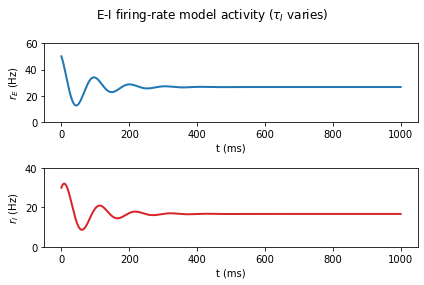

In [14]:
# Plot rates
fig, rE_line, rI_line = plot_rates(
    title='E-I firing-rate model activity ($τ_I$ varies)',
    tauI=init_tauI)

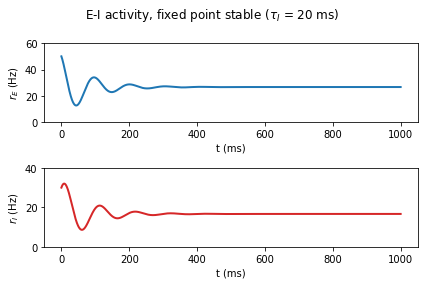

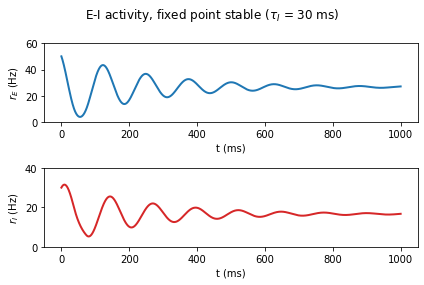

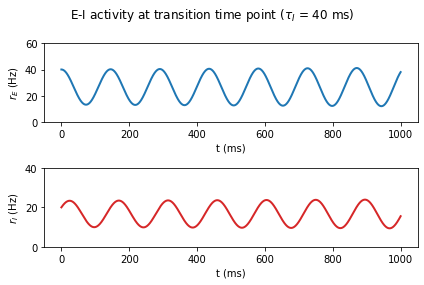

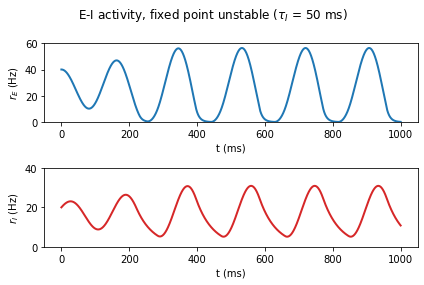

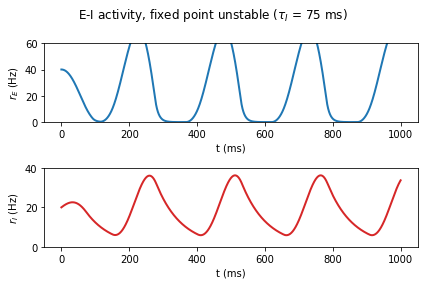

In [15]:
_, _, _ = plot_rates(title='E-I activity, fixed point stable ($τ_I$ = 20 ms)', tauI=20)

_, _, _ = plot_rates(title='E-I activity, fixed point stable ($τ_I$ = 30 ms)', tauI=30)

_, _, _ = plot_rates(title='E-I activity at transition time point ($τ_I$ = 40 ms)', tauI=tauI_transition)

_, _, _ = plot_rates(title='E-I activity, fixed point unstable ($τ_I$ = 50 ms)', tauI=50)

_, _, _ = plot_rates(title='E-I activity, fixed point unstable ($τ_I$ = 75 ms)', tauI=75)

- For $τ_Ι < 40 ms$ (where $Re\{\boldsymbol{λ}\} < 0$), firing rates gradually settle from periodic oscillations into a fixed point, as seen in the $τ_Ι = 30 ms$ example.
- For $τ_Ι > 40 ms$ (where $Re\{\boldsymbol{λ}\} > 0$), firing rates gradually settle from a fixed point into periodic oscillations, as seen in the $τ_Ι = 50 ms$ example.